# Logistic regression exercise with Titanic data

## Introduction

- Data from Kaggle's Titanic competition: [data](../data/titanic.csv), [data dictionary](https://www.kaggle.com/c/titanic/data)
- **Goal**: Predict survival based on passenger characteristics
- `titanic.csv` is already in our repo, so there is no need to download the data from the Kaggle website

## Step 1: Read the data into a Pandas dataframe

In [24]:
# Read the data into a Panda's dataframe and display the head of the file.  Use PassengerID as the index_col
import pandas as pd
url = '/Users/jennawhite/Documents/DS-SEA-4/data/titanic.csv'
titanic = pd.read_csv(url, index_col='PassengerId')

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale=1.5)

titanic.head()



,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Step 2: Create X and y

Define **Pclass** and **Parch** as the features, and **Survived** as the response.

In [34]:
feature_cols = ['Pclass','Parch']
X = titanic[feature_cols]
y = titanic.Survived

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()



## Step 3: Split the data into training and testing sets

In [28]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=123)

## Step 4: Fit a logistic regression model and examine the coefficients

Confirm that the coefficients make intuitive sense.

In [38]:
logreg.fit(X_train,y_train)

titanic['survive_pred']=logreg.predict(X)

zip(feature_cols, logreg.coef_[0])

[('Pclass', -0.78656827267609286), ('Parch', 0.27138557274545705)]

## Step 5: Make predictions on the testing set and calculate the accuracy

In [39]:
# class predictions
logreg.predict(X_test)


array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [40]:
# calculate classification accuracy
logreg.score(X_test,y_test)


0.69955156950672648

## Step 6: Compare your testing accuracy to the null accuracy

In [45]:
y_test.value_counts().head(2) / len(y_test)

0    0.623318
1    0.376682
Name: Survived, dtype: float64

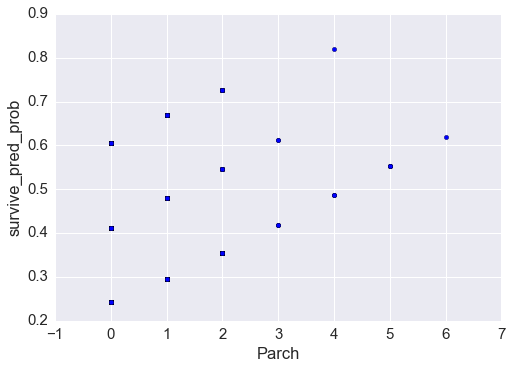

In [50]:

titanic['survive_pred_prob'] = logreg.predict_proba(X)[:, 1]

sns.lmplot(x='Parch', y='Survived')